In [2]:
import os
import numpy as np
import astropy.table as atable

from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

In [3]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
# load compiled zsuccess rates to file
dat_dir = '/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/'

sv1_gals = atable.Table.read(os.path.join(dat_dir, 'sv1.bgs_exps.efftime160_200.zsuccess.v4.fits'))
sv3_gals = atable.Table.read(os.path.join(dat_dir, 'sv3.bgs_exps.efftime160_200.zsuccess.v4.fits'))
main_gals = atable.Table.read(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.v3.fits'))

In [6]:
sv1_brgt = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_BRIGHT']) != 0 
sv1_fain = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_FAINT']) != 0

sv3_brgt = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_BRIGHT']) != 0 
sv3_fain = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT']) != 0 

In [23]:
sv1_gals.colnames

['DEEP_NUMEXP',
 'DEEP_TSNR2_BGS',
 'DEEP_EXPTIME',
 'TARGETID',
 'Z_TRUE',
 'DEEP_TRUE',
 'CHI2',
 'COEFF',
 'Z',
 'ZERR',
 'ZWARN',
 'NPIXELS',
 'SPECTYPE',
 'SUBTYPE',
 'NCOEFF',
 'DELTACHI2',
 'PETAL_LOC',
 'DEVICE_LOC',
 'LOCATION',
 'FIBER',
 'COADD_FIBERSTATUS',
 'TARGET_RA',
 'TARGET_DEC',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'LAMBDA_REF',
 'FA_TARGET',
 'FA_TYPE',
 'OBJTYPE',
 'FIBERASSIGN_X',
 'FIBERASSIGN_Y',
 'PRIORITY',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'RELEASE',
 'BRICKID',
 'BRICK_OBJID',
 'MORPHTYPE',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PARALLAX',
 'BRICKNAME',
 'EBV',
 'FLUX_W1',
 'FLUX_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'MASKBITS',
 'SERSIC',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'PHOTSYS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'SV1_DESI_TARGET',
 'SV1

(0.0, 10.0)

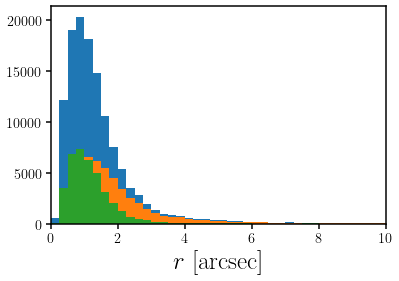

In [15]:
plt.hist(sv1_gals['SHAPE_R'], range=(0., 10), bins=40)
plt.hist(sv1_gals['SHAPE_R'][sv1_brgt], range=(0., 10), bins=40)
plt.hist(sv1_gals['SHAPE_R'][sv1_fain], range=(0., 10), bins=40)
plt.xlabel('$r$ [arcsec]', fontsize=25) #Half-light radius of galaxy model for galaxy type type (>0)
plt.xlim(0., 10)

(0.0, 10.0)

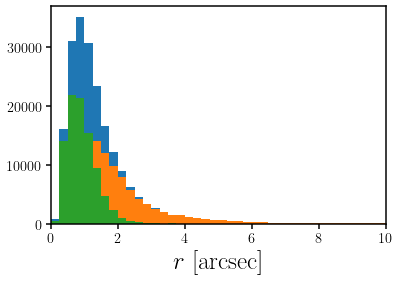

In [16]:
plt.hist(sv3_gals['SHAPE_R'], range=(0., 10), bins=40)
plt.hist(sv3_gals['SHAPE_R'][sv3_brgt], range=(0., 10), bins=40)
plt.hist(sv3_gals['SHAPE_R'][sv3_fain], range=(0., 10), bins=40)
plt.xlabel('$r$ [arcsec]', fontsize=25) #Half-light radius of galaxy model for galaxy type type (>0)
plt.xlim(0., 10)

In [19]:
print("%i of %i (%.2f) SV1 BRIGHT have r < 1''" % (np.sum(sv1_brgt & (sv1_gals['SHAPE_R'] < 1.)), np.sum(sv1_brgt), np.sum(sv1_brgt & (sv1_gals['SHAPE_R'] < 1.)) / np.sum(sv1_brgt)))
print("%i of %i (%.2f) SV1 FAINT have r < 1''" % (np.sum(sv1_fain & (sv1_gals['SHAPE_R'] < 1.)), np.sum(sv1_fain), np.sum(sv1_fain & (sv1_gals['SHAPE_R'] < 1.)) / np.sum(sv1_fain)))

print("%i of %i (%.2f) SV1 ALL have r < 1''" % (np.sum((sv1_brgt | sv1_fain) & (sv1_gals['SHAPE_R'] < 1.)), 
                                                np.sum(sv1_brgt | sv1_fain), 
                                                np.sum((sv1_brgt | sv1_fain) & (sv1_gals['SHAPE_R'] < 1.)) / np.sum(sv1_brgt | sv1_fain)))

10648 of 49556 (0.21) SV1 BRIGHT have r < 1''
17820 of 37982 (0.47) SV1 FAINT have r < 1''
28468 of 87538 (0.33) SV1 ALL have r < 1''


In [20]:
print("%i of %i (%.2f) SV3 BRIGHT have r < 1''" % (np.sum(sv3_brgt & (sv3_gals['SHAPE_R'] < 1.)), np.sum(sv3_brgt), np.sum(sv3_brgt & (sv3_gals['SHAPE_R'] < 1.)) / np.sum(sv3_brgt)))
print("%i of %i (%.2f) SV3 FAINT have r < 1''" % (np.sum(sv3_fain & (sv3_gals['SHAPE_R'] < 1.)), np.sum(sv3_fain), np.sum(sv3_fain & (sv3_gals['SHAPE_R'] < 1.)) / np.sum(sv3_fain)))
print("%i of %i (%.2f) SV3 ALL have r < 1''" % (np.sum((sv3_brgt | sv3_fain) & (sv3_gals['SHAPE_R'] < 1.)), 
                                                np.sum(sv3_brgt | sv3_fain), 
                                                np.sum((sv3_brgt | sv3_fain) & (sv3_gals['SHAPE_R'] < 1.)) / np.sum(sv3_brgt | sv3_fain))
     )

25280 of 113135 (0.22) SV3 BRIGHT have r < 1''
57506 of 91356 (0.63) SV3 FAINT have r < 1''
82786 of 204491 (0.40) SV3 ALL have r < 1''


In [21]:
print("%i of %i (%.2f) SV3 BRIGHT have r < 2''" % (np.sum(sv3_brgt & (sv3_gals['SHAPE_R'] < 2.)), np.sum(sv3_brgt), np.sum(sv3_brgt & (sv3_gals['SHAPE_R'] < 2.)) / np.sum(sv3_brgt)))
print("%i of %i (%.2f) SV3 FAINT have r < 2''" % (np.sum(sv3_fain & (sv3_gals['SHAPE_R'] < 2.)), np.sum(sv3_fain), np.sum(sv3_fain & (sv3_gals['SHAPE_R'] < 2.)) / np.sum(sv3_fain)))
print("%i of %i (%.2f) SV3 ALL have r < 2''" % (np.sum((sv3_brgt | sv3_fain) & (sv3_gals['SHAPE_R'] < 2.)), 
                                                np.sum(sv3_brgt | sv3_fain), 
                                                np.sum((sv3_brgt | sv3_fain) & (sv3_gals['SHAPE_R'] < 2.)) / np.sum(sv3_brgt | sv3_fain))
     )

76201 of 113135 (0.67) SV3 BRIGHT have r < 2''
89362 of 91356 (0.98) SV3 FAINT have r < 2''
165563 of 204491 (0.81) SV3 ALL have r < 2''
